# Preparation

In [1]:
from sklearn.datasets import load_breast_cancer
from IPython.display import Markdown, display

RANDOM_SEED = 5508
dataset = load_breast_cancer()  # Load the breast cancer dataset


def print_df(df):
    """
    Print DataFrame in a markdown format
    """
    display(Markdown(df.to_markdown()))
    display()

# Inspection and Preprocessing
## D1 Reorder columns and scatter plot

To re-order the columns based on their names, we first make a list containing name index pairs and sort the list based on the names. By doing so we can obtain the sorted names and their corresponding indices. Then we can use the indices to reorder the feature matrix.

In [2]:
pairs = list(zip(dataset["feature_names"], range(dataset["feature_names"].size)))
pairs.sort(key=lambda p: p[0])
sorted_feature_names = [p[0] for p in pairs]
feature_mapping = [p[1] for p in pairs]
sorted_data = dataset["data"][:, feature_mapping]

print(f"Target names: {dataset['target_names']}")
print(f"First 10 feature names: {sorted_feature_names[:10]}")

Target names: ['malignant' 'benign']
First 10 feature names: ['area error', 'compactness error', 'concave points error', 'concavity error', 'fractal dimension error', 'mean area', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension']


By reading the data description and target name of the data. We know that class 0 is malignant and class 1 is benign. To find out the relationship between the features, we prepare two function. `combination_pairs` will generate possible combinations of the features. `plot_pair` will plot the scatter plot of the given feature pairs.

In [3]:
import matplotlib.pyplot as plt
# Obtain samples of different classes
malignants = sorted_data[dataset["target"] == 0]
benigns = sorted_data[dataset["target"] == 1]


def combination_pairs(list):
    """
    Generate all possible pairs of elements in a list
    """
    result = []
    while len(list) > 1:
        first = list.pop(0)
        for element in list:
            result.append((first, element))
    return result


def plot_pair(axs, pairs):
    """
    Plot scatter plots of the pairs of features in the dataset
    """
    for i, pair in enumerate(pairs):
        x, y = pair # Indices of the features to plot
        ax = axs.flat[i]
        ax.scatter(
            malignants[:, x], malignants[:, y], c="r", alpha=0.2, label="Malignant"
        )
        ax.scatter(benigns[:, x], benigns[:, y], c="b", alpha=0.2, label="Benign")
        ax.set_xlabel(sorted_feature_names[x], fontsize=12)
        ax.set_ylabel(sorted_feature_names[y], fontsize=12)
        handles, labels = ax.get_legend_handles_labels()

    return handles, labels

Since we are going to inspect the first 10 features and there are 45 possible combinations, a 9 * 5 grid is used to display the scatter plots.

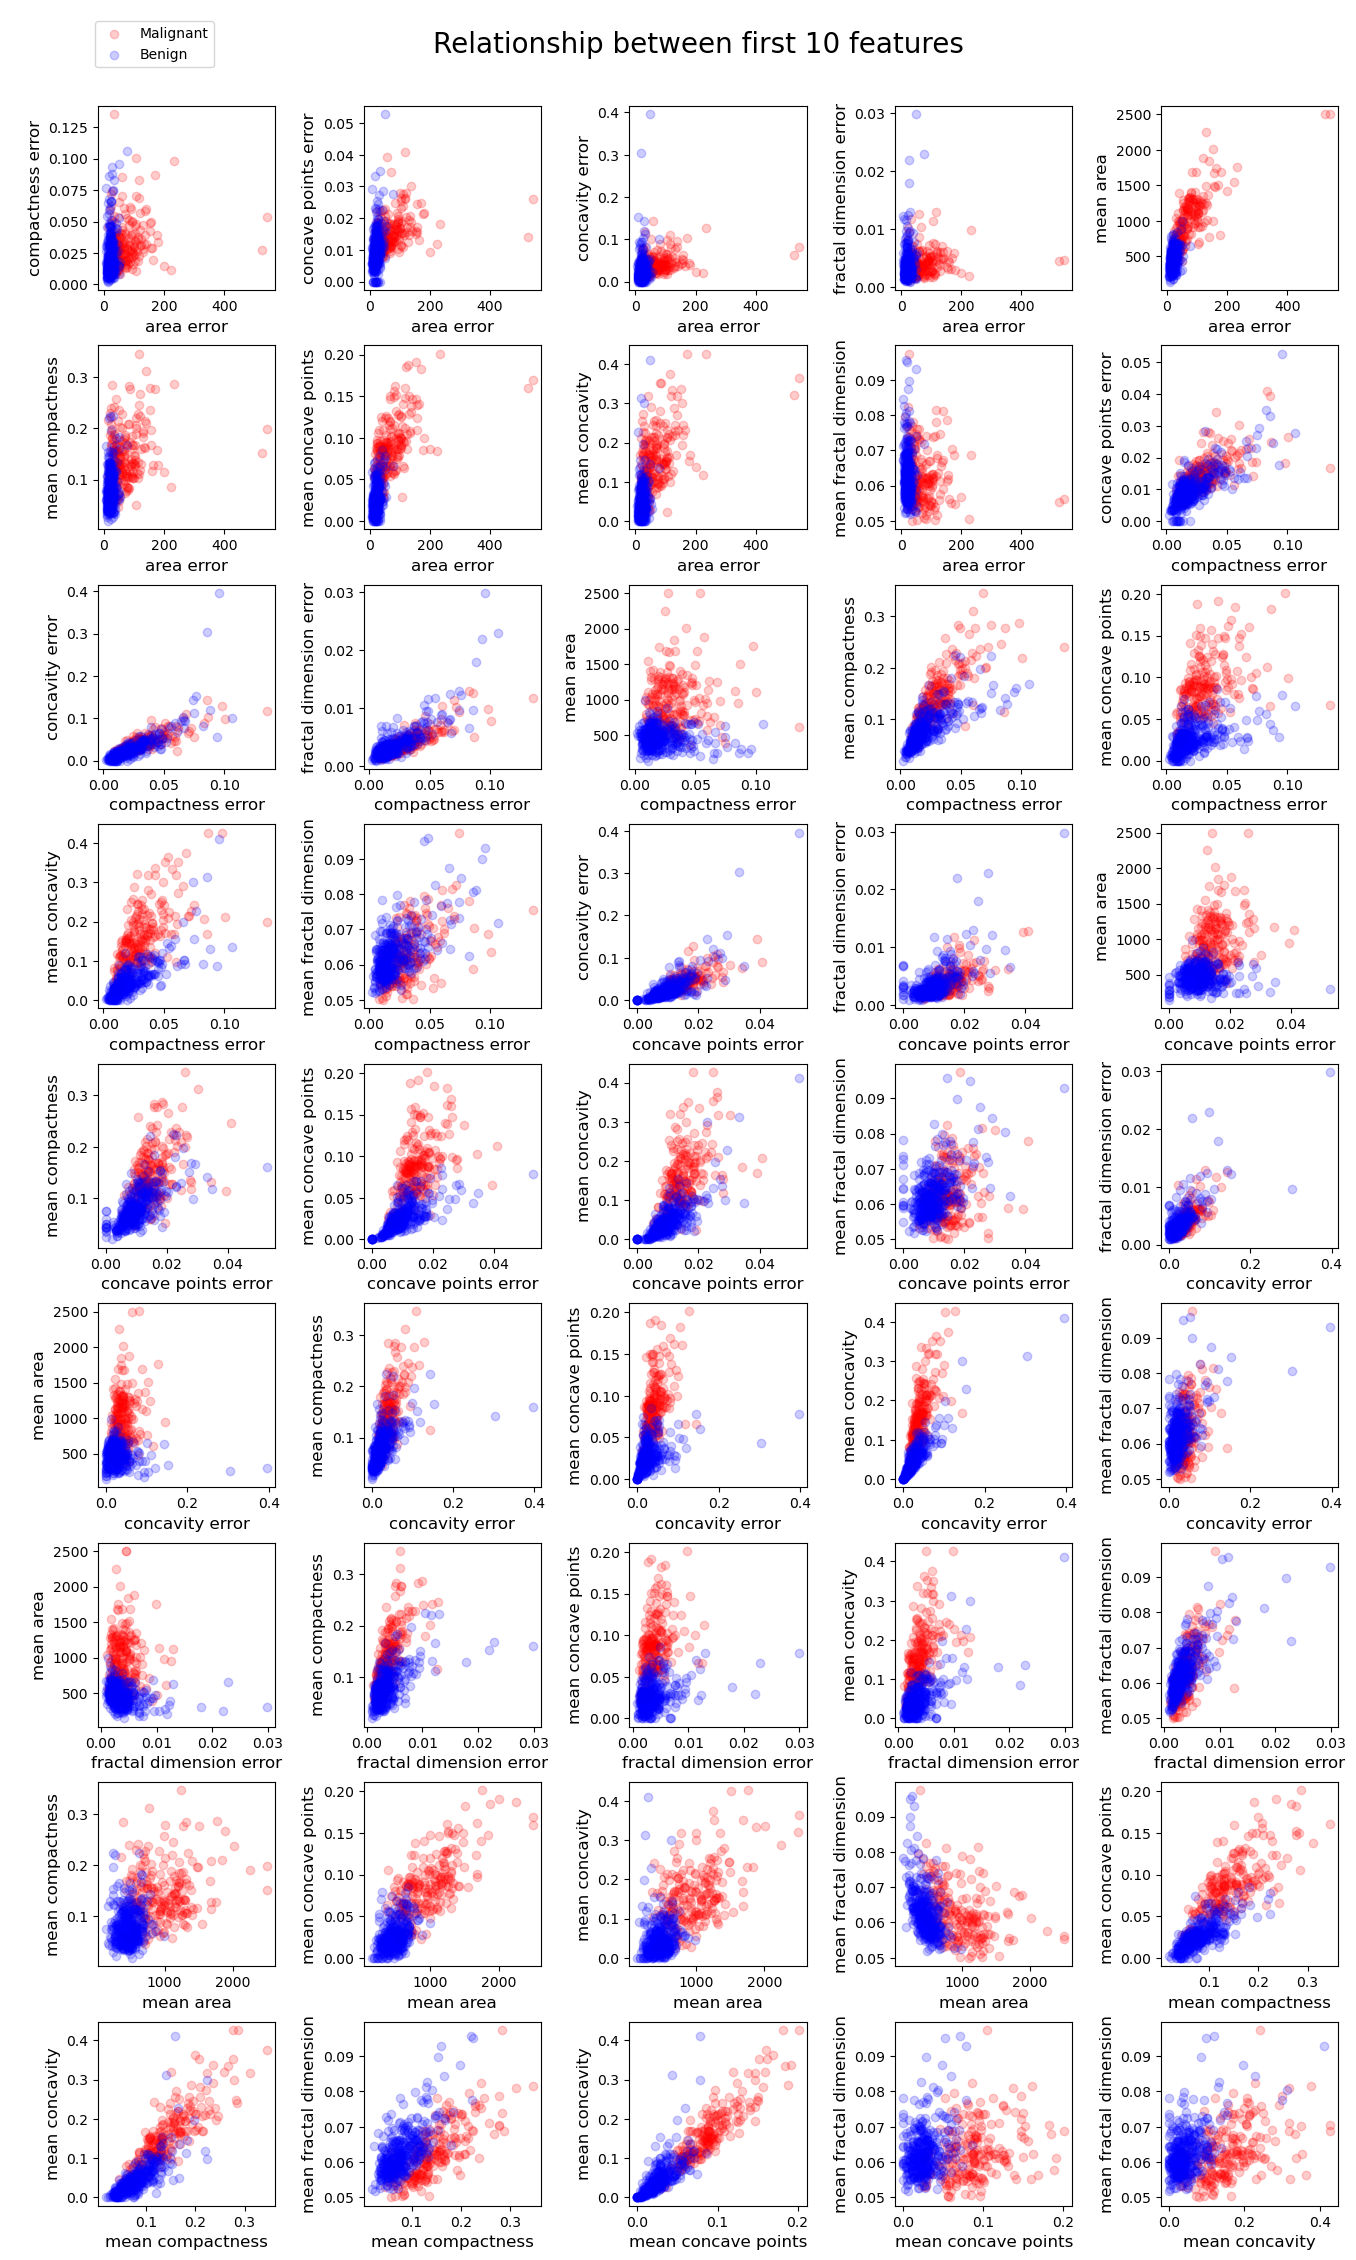

In [4]:
pairs = combination_pairs([i for i in range(10)])
fig, axs = plt.subplots(9, 5, figsize=(16, 25))
fig.suptitle("Relationship between first 10 features", fontsize=20)
plt.subplots_adjust(wspace=0.5, hspace=0.3, top=0.95)
handles, labels = plot_pair(axs, pairs)
fig.legend(handles, labels, loc=(0.07, 0.97));

## D2: Analysis relationship between features

- **What can be observed regarding the relationship between these features?**

    We can see from the plots that many of these 10 features are highly correlated. For example, `mean concave points` and `mean concavity`, `mean concave points` and `mean compactness`. But there are also some features that are not highly correlated with others. For example, `mean fractal dimension` and `mean concavity`.


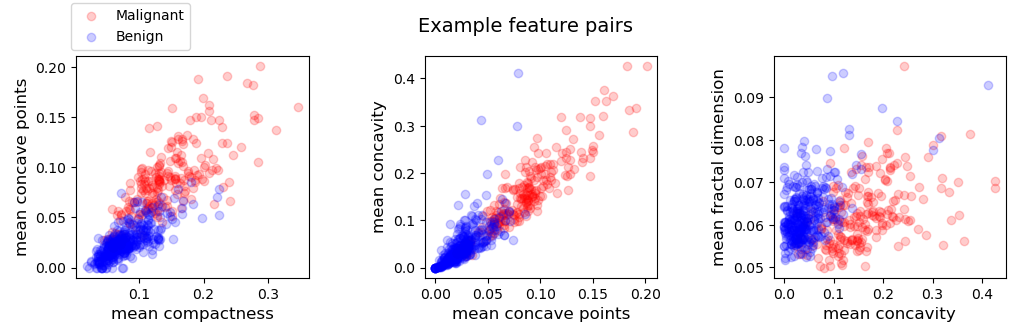

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.3, top=0.85)
fig.suptitle("Example feature pairs", fontsize=14)
handles, labels = plot_pair(axs, [[6, 7], [7, 8], [8, 9]])
fig.legend(handles, labels, loc=(0.07, 0.85));

- **Can you observe the presence of clusters of groups? How do they relate to the target variable?**
    
    Yes, from three plot above, we can see two classes is roughly linearly separable. In the first two pair we can see, the example with higher `mean concave points`, `mean concavity` and `mean compactness` are more likely to be malignant. Also in many other features, samples with higher values are more likely to be malignant.

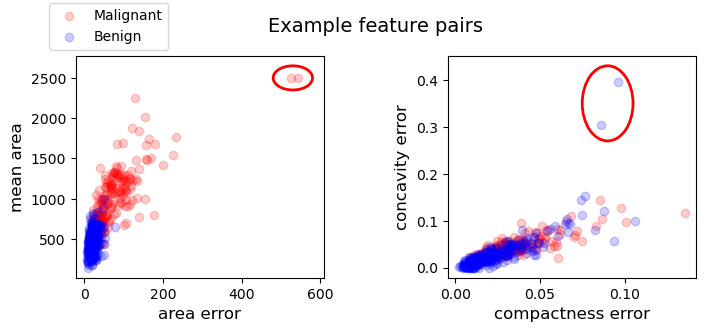

In [6]:
import matplotlib.patches as patches

fig, axs = plt.subplots(1, 2, figsize=(8, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.3, top=0.85)
fig.suptitle("Example feature pairs", fontsize=14)
handles, labels = plot_pair(axs, [[0, 5], [1, 3]])
fig.legend(handles, labels, loc=(0.07, 0.85))
circle = patches.Ellipse((530, 2500), 100, 300, fill=False, edgecolor="r", linewidth=2)
axs[0].add_patch(circle)
circle = patches.Ellipse(
    (0.09, 0.35), 0.03, 0.16, fill=False, edgecolor="r", linewidth=2
)
axs[1].add_patch(circle);

- **Are there any instances that could be outliers?**

    Yes, some possible outliers example are shown above.
- **Are there features that could be removed? Why or why not?**

    No, I don't think there are any features that can be removed in the first 10 features. Some features may be correlated to some extent, or not explicitly useful for the classification task, but they may still contain valuable information that can be used later.

## D3: Correlation matrix

Now we use heatmap from seaborn to plot the correlation matrix.

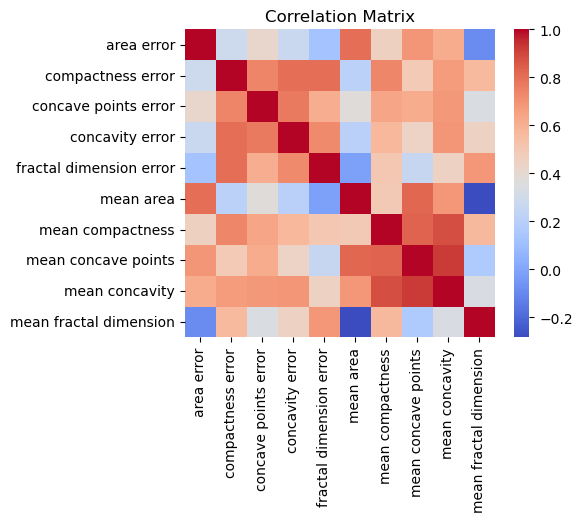

In [7]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(sorted_data[:, :10], columns=sorted_feature_names[:10])
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## D4: Do the correlation coefficients support your previous observations?

Yes, from the correlation matrix, we can see that many feature pairs have high correlation coefficients above 0.5. And some features have low correlation coefficients with others. But there are no features that have correlation coefficients close to 1, which means that there are no features can be removed.

## D5: Create a code that drop the features: mean perimeter, mean radius, worst radius, worst perimeter and radius error.

Firstly, we get the indices that need to be removed. Then we use numpy to remove the columns.

In [8]:
import numpy as np

drop_features = [
    "mean perimeter",
    "mean radius",
    "worst radius",
    "worst perimeter",
    "radius error",
]
drop_indices = [sorted_feature_names.index(feature) for feature in drop_features]

new_feature_names = np.delete(sorted_feature_names, drop_indices)
new_data = np.delete(sorted_data, drop_indices, axis=1)

print(f"New data shape: {new_data.shape}")
print(f"New feature names: {new_feature_names}")

New data shape: (569, 25)
New feature names: ['area error' 'compactness error' 'concave points error' 'concavity error'
 'fractal dimension error' 'mean area' 'mean compactness'
 'mean concave points' 'mean concavity' 'mean fractal dimension'
 'mean smoothness' 'mean symmetry' 'mean texture' 'perimeter error'
 'smoothness error' 'symmetry error' 'texture error' 'worst area'
 'worst compactness' 'worst concave points' 'worst concavity'
 'worst fractal dimension' 'worst smoothness' 'worst symmetry'
 'worst texture']


In the data matrix, only 25 features are left.

# Fitting a Decision Tree model with default hyperparameters
## D6: Fit a decision tree classifier using default hyperparameters using 80% of the data.

Firstly, we prepare some function to evaluate the model performance.

In [9]:
import matplotlib.pyplot as plot
import seaborn as sb

def calc_performance(y_hat, y, threshold=0.5):
    epsilon = 1e-16
    tp = np.sum((y_hat > threshold) & (y == 1))
    fp = np.sum((y_hat > threshold) & (y == 0))
    fn = np.sum((y_hat <= threshold) & (y == 1))
    tn = np.sum((y_hat <= threshold) & (y == 0))

    accuracy = (tp + tn) / (tp + tn + fp + fn + epsilon)
    precision = tp / (tp + fp + epsilon)
    recall = tp / (tp + fn + epsilon)
    f1 = 2 * precision * recall / (precision + recall + epsilon)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "tp": tp,
        "fp": fp,
        "fn": fn,
        "tn": tn,
        "confusion": np.array([[tp, fp], [fn, tn]]),
    }


def performance_table(performance):
    print_df(
        pd.DataFrame(
            {
                "Accuracy": performance["accuracy"],
                "Precision": performance["precision"],
                "Recall": performance["recall"],
            },
            index=["Value"],
        )
    )


def confusion_table(performance):
   
    df = pd.DataFrame(
        performance["confusion"],
        columns=["Benigns", "Malignants"],
        index=["Benigns", "Malignants"],
    )
    plot.figure(figsize=(2.5, 2))
    sb.heatmap(df, annot=True)
    plot.title('Confusion Matrix')
    plot.xlabel('Actal Values')
    plot.ylabel('Predicted Values')
    plot.show()

Then, a decision tree classifier is trained following the instruction. And the performance is evaluated.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    new_data, dataset["target"], train_size=0.8, random_state=RANDOM_SEED
)

clf_d6 = DecisionTreeClassifier(random_state=RANDOM_SEED)
clf_d6.fit(train_data, train_target);

Train set performance:


|       |   Accuracy |   Precision |   Recall |
|:------|-----------:|------------:|---------:|
| Value |          1 |           1 |        1 |



Test set performance:


|       |   Accuracy |   Precision |   Recall |
|:------|-----------:|------------:|---------:|
| Value |   0.964912 |    0.972603 | 0.972603 |

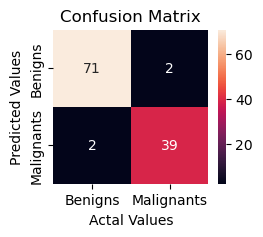

In [11]:
train_pred = clf_d6.predict(train_data)
test_pred = clf_d6.predict(test_data)

print("Train set performance:")
performance_d6_train = calc_performance(train_pred, train_target)
performance_table(performance_d6_train)

print("\n")
print("Test set performance:")
performance_d6 = calc_performance(test_pred, test_target)
performance_table(performance_d6)
confusion_table(performance_d6)

## D7: Comment on these results. Do you think your classifier is overfitting? If so, why this is happening? If not, why not?

The drop in performance indicates that the model is overfitting. While the accuracy on training set is 1, the accuracy on test set only reaches 0.964. That happens because the model used is too complex and fit to the train data completely. In the case of decision tree, it might because we allow the tree to grow too deep.

## D8: Display the decision tree built from the training process (like the one shown in Figure 6.1 of the textbook for the iris dataset).

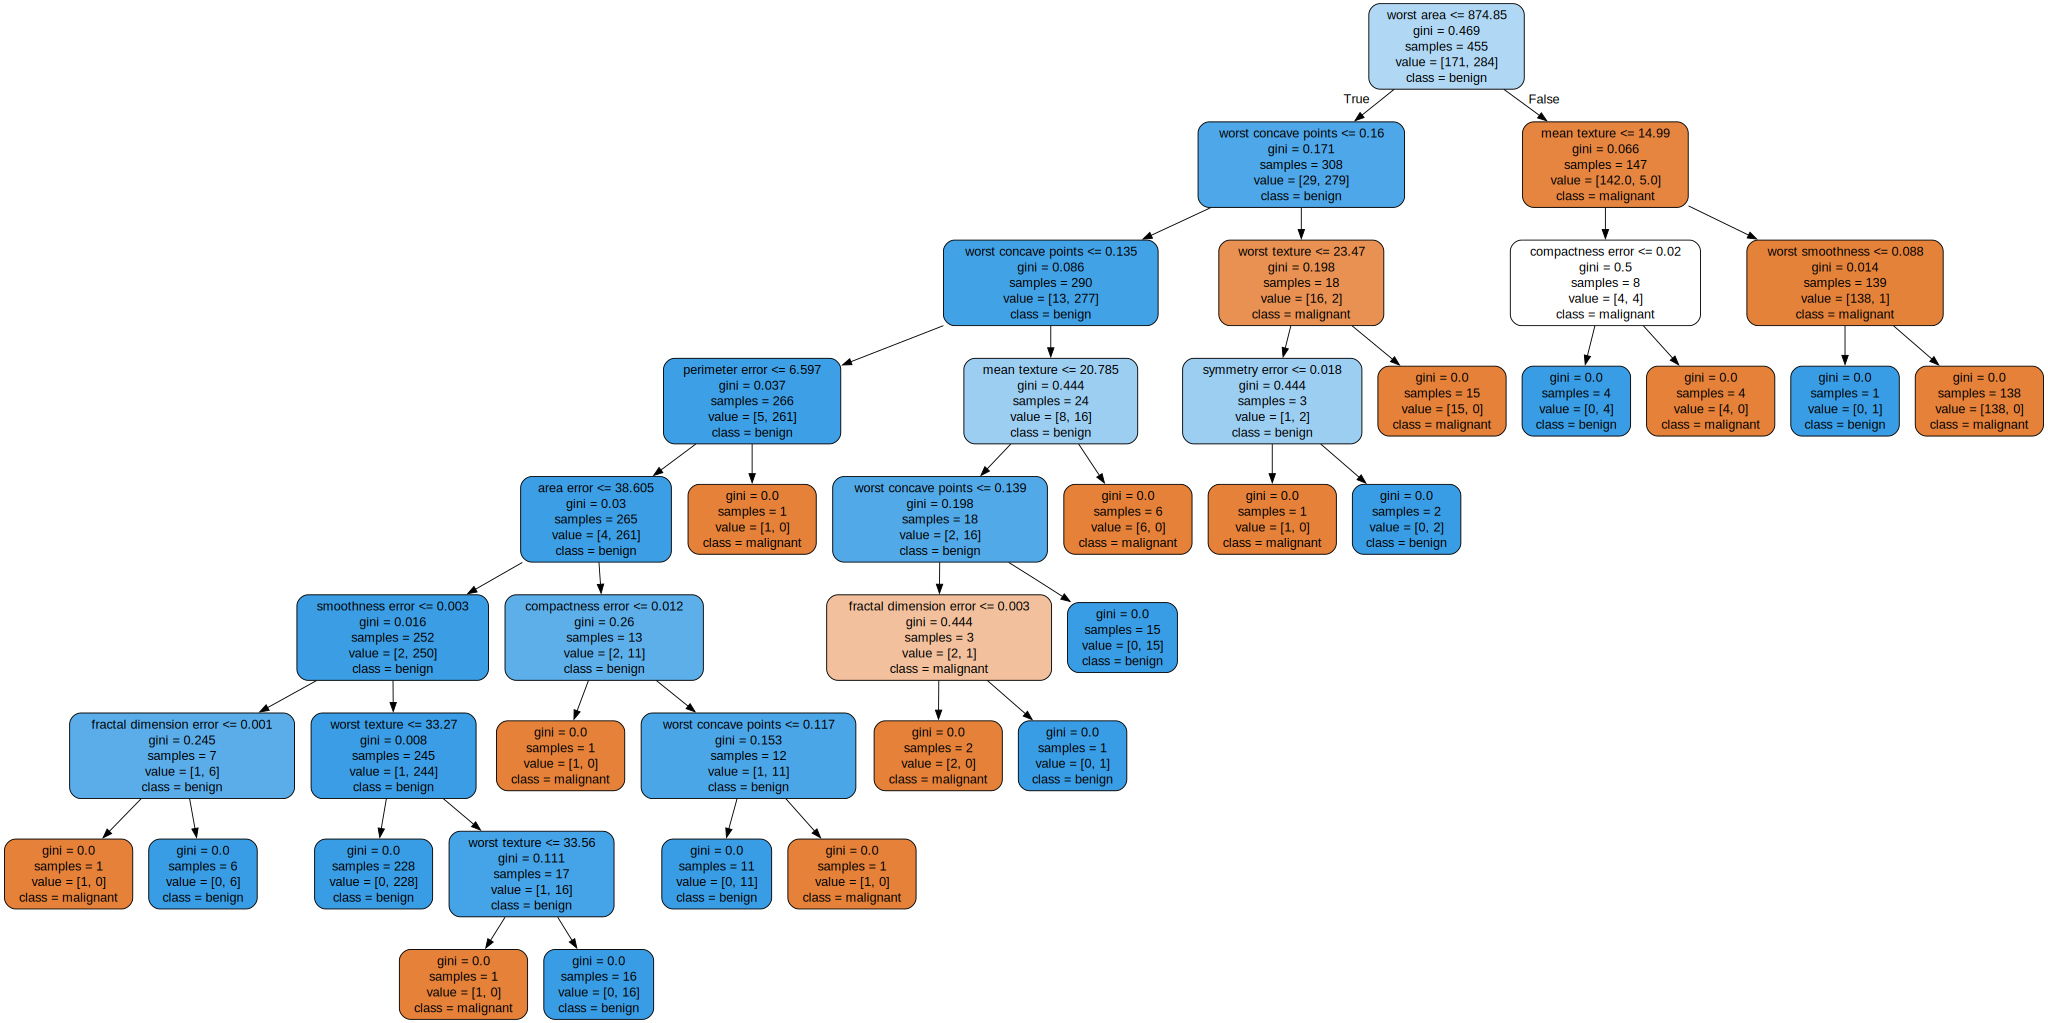

In [12]:
from sklearn.tree import export_graphviz
from graphviz import Source

IMAGES_PATH = "./images/tree.dot"
export_graphviz(
    clf_d6,
    out_file=IMAGES_PATH,
    feature_names=new_feature_names,
    class_names=dataset["target_names"],
    rounded=True,
    filled=True,
)

Source.from_file(IMAGES_PATH)

## D9: Study the tree diagram and comment on the following:

- **How many levels resulted from the model?**

    Including the leaf nodes, there are 9 levels in the tree.

- **Did the diagram help you to confirm whether the classifier has an overfitting issue?**

    Yes. The diagram shows that, the tree is too deep and in some of its leaf nodes only a few samples are remained. That indicates that the model is overfitting.

- **What can you observe from the leaves?**

    As memtioned above, some leaf nodes only contain a few samples. That is not good for the generalization of the model.

- **Is this an interpretable model?**

    Yes, the model is interpretable. We can see how the model makes the decision by analyzing the tree. 

## D10: Repeat the data split another four times, each using 80% of the data to train the model and the remaining 20% for testing. For these splits, set the seed of the random state to the values “5509”, “5510”, “5511” and “5512”. The random state of the model can be kept at “5508”.

Following the instruction, we train the model with different data spliting and store the performance for comparison.

In [13]:
seeds = [5508, 5509, 5510, 5511, 5512]
accuracies = []
precisions = []
recalls = []

for seed in seeds:
    train_data, test_data, train_target, test_target = train_test_split(
        new_data, dataset["target"], train_size=0.8, random_state=seed
    )
    clf = DecisionTreeClassifier(random_state=RANDOM_SEED)
    clf.fit(train_data, train_target)
    train_pred = clf.predict(train_data)
    test_pred = clf.predict(test_data)
    performance = calc_performance(test_pred, test_target)
    accuracies.append(performance["accuracy"])
    precisions.append(performance["precision"])
    recalls.append(performance["recall"])

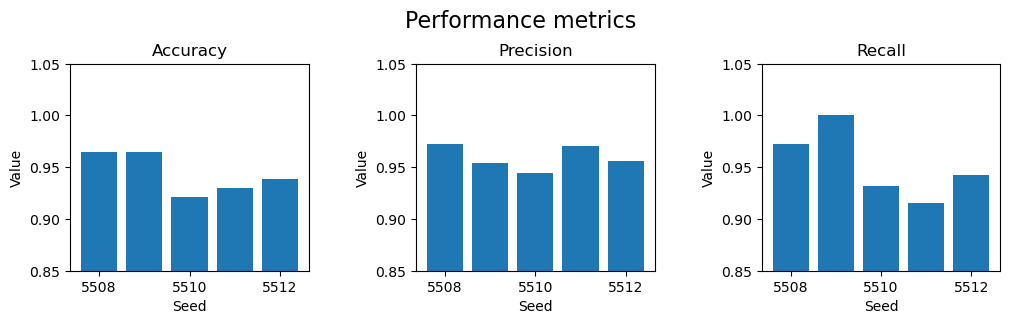

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
fig.suptitle("Performance metrics", fontsize=16)
plt.subplots_adjust(wspace=0.45, hspace=0.3, top=0.8)
for i, metric in enumerate(["Accuracy", "Precision", "Recall"]):
    axs[i].bar(seeds, [accuracies, precisions, recalls][i])
    axs[i].set_title(metric)
    axs[i].set_xlabel("Seed")
    axs[i].set_ylabel("Value")
    axs[i].set_ylim(0.85, 1.05)

plt.show()

We can see that the consistency of performance is not good. There are huge differences between the performance of the different splits. All of them get a gap of around 0.06 between top and bottom. This may indicate that the model is not stable, i.e. the performance of the model is strongly affected by different data splits.

## D11: Investigate the impact of the training size on the performance of the model.

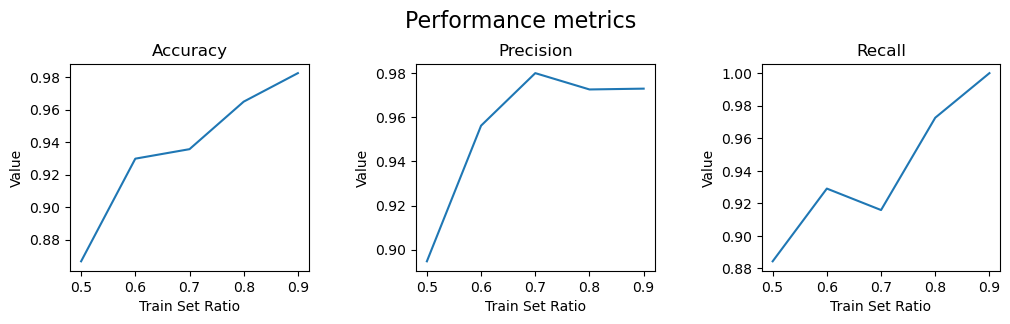

In [15]:
ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
accuracies = []
precisions = []
recalls = []


for ratio in ratios:
    train_data, test_data, train_target, test_target = train_test_split(
        new_data, dataset["target"], train_size=ratio, random_state=RANDOM_SEED
    )
    clf = DecisionTreeClassifier(random_state=RANDOM_SEED)
    clf.fit(train_data, train_target)
    train_pred = clf.predict(train_data)
    test_pred = clf.predict(test_data)
    performance = calc_performance(test_pred, test_target)
    accuracies.append(performance["accuracy"])
    precisions.append(performance["precision"])
    recalls.append(performance["recall"])

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
fig.suptitle("Performance metrics", fontsize=16)
plt.subplots_adjust(wspace=0.45, hspace=0.3, top=0.8)
axs[0].plot(ratios, accuracies)
axs[0].set_xlabel("Train Set Ratio")
axs[0].set_title("Accuracy")
axs[0].set_ylabel("Value")
axs[1].plot(ratios, precisions)
axs[1].set_title("Precision")
axs[1].set_xlabel("Train Set Ratio")
axs[1].set_ylabel("Value")
axs[2].plot(ratios, recalls)
axs[2].set_title("Recall")
axs[2].set_xlabel("Train Set Ratio")
axs[2].set_ylabel("Value")

plt.show()

In line with our intuition, the model is generally able to learn more from the data as the train set ratio increases, resulting in better performance. However, we also see some decrease in precision and recall, which may mean that the model is overfitting to the training data and has lost some ability to generalise to the test data.

# Fitting a Decision Tree model with optimal hyperparameters
## D12: With the optimal obtained hyperparameters, retrain the model and report:

First we perform a grid search to find the optimal combination of hyperparameters.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

train_data, test_data, train_target, test_target = train_test_split(
    new_data, dataset["target"], train_size=0.8, random_state=RANDOM_SEED
)

grid_search_cv_d12 = GridSearchCV(
    DecisionTreeClassifier(random_state=RANDOM_SEED),
    param_grid={
        "max_depth": [2, 3, 4, 5],
        "min_samples_split": [2, 4, 5, 10],
        "min_samples_leaf": [2, 5],
    },
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1,
    scoring="accuracy",
).fit(train_data, train_target)

Now we retain the model with the optimal obtained hyperparameters.

Optimal hyperparameters:


|       |   max_depth |   min_samples_leaf |   min_samples_split |
|:------|------------:|-------------------:|--------------------:|
| Value |           3 |                  2 |                   2 |

Train set performance


|       |   Accuracy |   Precision |   Recall |
|:------|-----------:|------------:|---------:|
| Value |   0.964835 |    0.952703 | 0.992958 |

Test set performance


|       |   Accuracy |   Precision |   Recall |
|:------|-----------:|------------:|---------:|
| Value |   0.938596 |    0.958333 | 0.945205 |

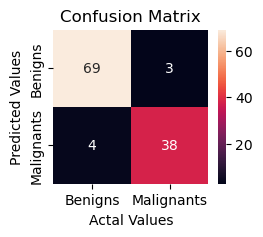

In [17]:
clf_d12 = DecisionTreeClassifier(random_state=RANDOM_SEED, **grid_search_cv_d12.best_params_)
clf_d12.fit(train_data, train_target)
train_pred = clf_d12.predict(train_data)
test_pred = clf_d12.predict(test_data)
print(f"Optimal hyperparameters:")
print_df(pd.DataFrame(grid_search_cv_d12.best_params_, index=["Value"]))
print("Train set performance")
performance_d12_train = calc_performance(train_pred, train_target)
performance_table(performance_d12_train)
print("Test set performance")
performance_d12 = calc_performance(test_pred, test_target)
performance_table(performance_d12)
confusion_table(performance_d12)

## D13: Comment: What was the impact of fine-tuning the hyperparameters as opposed to what you obtained in D6? Has fine-tuning done what you expected?

In [18]:
print("The performance on D6 and D12 models are compared below:")
print("D6 model train performance:")
performance_table(performance_d6_train)
print("D6 model test performance:")
performance_table(performance_d6)
print("D12 model train performance:")
performance_table(performance_d12_train)
print("D12 model test performance:")
performance_table(performance_d12)

The performance on D6 and D12 models are compared below:
D6 model train performance:


|       |   Accuracy |   Precision |   Recall |
|:------|-----------:|------------:|---------:|
| Value |          1 |           1 |        1 |

D6 model test performance:


|       |   Accuracy |   Precision |   Recall |
|:------|-----------:|------------:|---------:|
| Value |   0.964912 |    0.972603 | 0.972603 |

D12 model train performance:


|       |   Accuracy |   Precision |   Recall |
|:------|-----------:|------------:|---------:|
| Value |   0.964835 |    0.952703 | 0.992958 |

D12 model test performance:


|       |   Accuracy |   Precision |   Recall |
|:------|-----------:|------------:|---------:|
| Value |   0.938596 |    0.958333 | 0.945205 |

We can see that, after fine-tuning the hyperparameters, both train performance and test performance droped. We can see that the overfitting problem is slightly reduced, the gap of accuracy between train and test set is reduced from 0.035 to 0.026. But the drop in performance is too large to be acceotable. In conclusion, fine-tuning didn't do what I expected, maybe grid search doesn't always work to improve the model.

## D14: Repeat the training of task D12 twice: one considering the scoring argument of the grid-search function as precision and the other recall.

Scoring accuracy: optimal hyperparameters


|       |   max_depth |   min_samples_leaf |   min_samples_split |
|:------|------------:|-------------------:|--------------------:|
| Value |           3 |                  2 |                   2 |

Scoring accuracy: confusion matrix


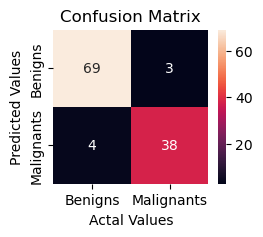

Scoring precision: optimal hyperparameters


|       |   max_depth |   min_samples_leaf |   min_samples_split |
|:------|------------:|-------------------:|--------------------:|
| Value |           4 |                  2 |                   2 |

Scoring precision: confusion matrix


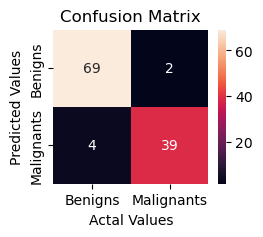

Scoring recall: optimal hyperparameters


|       |   max_depth |   min_samples_leaf |   min_samples_split |
|:------|------------:|-------------------:|--------------------:|
| Value |           3 |                  5 |                   2 |

Scoring recall: confusion matrix


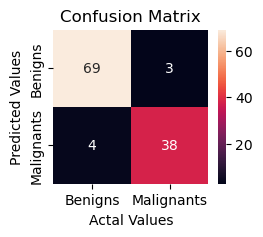

In [19]:
scorings = ["accuracy", "precision", "recall"]
scorings_performances = []
scorings_params = []
for scoring in scorings:
    grid_search_cv = GridSearchCV(
        DecisionTreeClassifier(random_state=RANDOM_SEED),
        param_grid={
            "max_depth": [2, 3, 4, 5],
            "min_samples_split": [2, 4, 5, 10],
            "min_samples_leaf": [2, 5],
        },
        cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        n_jobs=-1,
        scoring=scoring,
    ).fit(train_data, train_target)
    scorings_params.append(grid_search_cv.best_params_)
    clf = DecisionTreeClassifier(random_state=RANDOM_SEED, **grid_search_cv.best_params_)
    clf.fit(train_data, train_target)
    test_pred = grid_search_cv.predict(test_data)
    scorings_performances.append(calc_performance(test_pred, test_target))

for i, scoring in enumerate(scorings):
    print(f"Scoring {scoring}: optimal hyperparameters")
    print_df(pd.DataFrame(scorings_params[i], index=["Value"]))
    print(f"Scoring {scoring}: confusion matrix")
    confusion_table(scorings_performances[i])

From the results, we can see that with different scoring argements, we obtain different optimal hyperparameters. But their performances are similar. Among the three scoring arguments, precision gives the best performance. Considering the problem we are facing, precision will be a more suitable choice, because we want to avoid false positive, and recongnize the malignant cases as much as possible. 

# Fitting a Decision Tree with optimal hyperparameters and a reduced feature set
## D15: Using the model with fine-tuned hyperparameters based on accuracy (the one you obtained in D12), display the feature importance for each feature obtained from the training process. You should sort the feature importances in descending order.

In [20]:
pairs = list(
    zip(new_feature_names, clf_d12.feature_importances_)
)
pairs.sort(key=lambda x: x[1], reverse=True)
pairs

[('worst area', 0.8015424324170323),
 ('worst concave points', 0.15104011547844193),
 ('mean smoothness', 0.019469046924103426),
 ('mean texture', 0.012717066518201463),
 ('worst texture', 0.01177506159092728),
 ('perimeter error', 0.003456277071293734),
 ('area error', 0.0),
 ('compactness error', 0.0),
 ('concave points error', 0.0),
 ('concavity error', 0.0),
 ('fractal dimension error', 0.0),
 ('mean area', 0.0),
 ('mean compactness', 0.0),
 ('mean concave points', 0.0),
 ('mean concavity', 0.0),
 ('mean fractal dimension', 0.0),
 ('mean symmetry', 0.0),
 ('smoothness error', 0.0),
 ('symmetry error', 0.0),
 ('texture error', 0.0),
 ('worst compactness', 0.0),
 ('worst concavity', 0.0),
 ('worst fractal dimension', 0.0),
 ('worst smoothness', 0.0),
 ('worst symmetry', 0.0)]

## D16: Using the feature importance you calculated in the previous task, trim the feature dimension of the data.

In [21]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(
    clf_d12, prefit=True, threshold=0.01
).fit(train_data, train_target)

retained_features = np.array(new_feature_names)[selector.get_support()]
removed_features = np.delete(new_feature_names, selector.get_support())

print(f"Retained features: {retained_features}")
print(f"Removed features: {removed_features}")

Retained features: ['mean smoothness' 'mean texture' 'worst area' 'worst concave points'
 'worst texture']
Removed features: ['area error' 'compactness error' 'concave points error' 'concavity error'
 'fractal dimension error' 'mean area' 'mean compactness'
 'mean concave points' 'mean concavity' 'mean fractal dimension'
 'mean symmetry' 'perimeter error' 'smoothness error' 'symmetry error'
 'texture error' 'worst compactness' 'worst concavity'
 'worst fractal dimension' 'worst smoothness' 'worst symmetry']


In [22]:
total_importance = 0

for i, is_retained in enumerate(selector.get_support()):
    if is_retained:
        total_importance += grid_search_cv.best_estimator_.feature_importances_[i]

print(f"Total importance of retained features: {total_importance}")

Total importance of retained features: 0.9937533970263395


## D17: Compare the model’s performance (accuracy, precision, recall) on training and test sets when using the reduced set of features and the model trained on the complete set of features.

In [23]:
reduced_train_data = train_data[:, selector.get_support()]
reduced_test_data = test_data[:, selector.get_support()]

grid_search_cv_d17 = GridSearchCV(
    DecisionTreeClassifier(random_state=RANDOM_SEED),
    param_grid={
        "max_depth": [2, 3, 4, 5],
        "min_samples_split": [2, 4, 5, 10],
        "min_samples_leaf": [2, 5],
    },
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1,
    scoring="accuracy",
).fit(reduced_train_data, train_target)

clf_d17 = DecisionTreeClassifier(random_state=RANDOM_SEED, **grid_search_cv_d17.best_params_)
clf_d17.fit(reduced_train_data, train_target);

D17 Optimal hyperparameters:


|       |   max_depth |   min_samples_leaf |   min_samples_split |
|:------|------------:|-------------------:|--------------------:|
| Value |           4 |                  2 |                   5 |

D17 Train set performance:


|       |   Accuracy |   Precision |   Recall |
|:------|-----------:|------------:|---------:|
| Value |   0.978022 |    0.972414 | 0.992958 |

D17 Test set performance:


|       |   Accuracy |   Precision |   Recall |
|:------|-----------:|------------:|---------:|
| Value |   0.947368 |    0.971831 | 0.945205 |

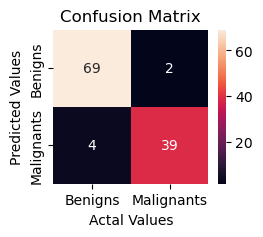

D12 Optimal hyperparameters:


|       |   max_depth |   min_samples_leaf |   min_samples_split |
|:------|------------:|-------------------:|--------------------:|
| Value |           3 |                  2 |                   2 |

D12 Train set performance:


|       |   Accuracy |   Precision |   Recall |
|:------|-----------:|------------:|---------:|
| Value |   0.964835 |    0.952703 | 0.992958 |

D12 Test set performance:


|       |   Accuracy |   Precision |   Recall |
|:------|-----------:|------------:|---------:|
| Value |   0.938596 |    0.958333 | 0.945205 |

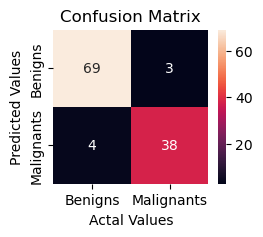

In [24]:
train_pred = clf_d17.predict(reduced_train_data)
test_pred = clf_d17.predict(reduced_test_data)
print(f"D17 Optimal hyperparameters:")
print_df(pd.DataFrame(grid_search_cv_d17.best_params_, index=["Value"]))
print("D17 Train set performance:")
performance_table(calc_performance(train_pred, train_target))
print("D17 Test set performance:")
performance = calc_performance(test_pred, test_target)
performance_table(performance)
confusion_table(performance)

train_pred = clf_d12.predict(train_data)
test_pred = clf_d12.predict(test_data)
print(f"D12 Optimal hyperparameters:")
print_df(pd.DataFrame(grid_search_cv_d12.best_params_, index=["Value"]))
print("D12 Train set performance:")
performance_table(calc_performance(train_pred, train_target))
print("D12 Test set performance:")
performance = calc_performance(test_pred, test_target)
performance_table(performance)
confusion_table(performance)

## D18: Comment on your results. What was the impact (if any) of reducing the number of features?

By reducing the number of features, both the train and test performance are slightly raised. And also we could know that performing a grid search on the reduced feature is necessary, since the optimal hyperparameters are different from the original model.

# Fitting a Random Forest
## D19: Considering all features and the 80%-20% data split you did before, use 10-fold cross-validation and grid-search to find a Random Forest classifier’s optimal hyperparameters n estimators (number of estimators) and max depth.

In [25]:
from sklearn.ensemble import RandomForestClassifier

grid_search_cv_d19 = GridSearchCV(
    RandomForestClassifier(random_state=RANDOM_SEED),
    param_grid={
        "n_estimators": [10, 20, 50, 100, 1000],
        "max_depth": [2, 3, 4, 5],
    },
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1,
    scoring="accuracy",
).fit(train_data, train_target)

clf_d19 = RandomForestClassifier(random_state=RANDOM_SEED, **grid_search_cv_d19.best_params_)
clf_d19.fit(train_data, train_target);

D19 Optimal hyperparameters:


|       |   max_depth |   n_estimators |
|:------|------------:|---------------:|
| Value |           4 |            100 |

D19 Train set performance


|       |   Accuracy |   Precision |   Recall |
|:------|-----------:|------------:|---------:|
| Value |   0.991209 |    0.986111 |        1 |

D19 Test set performance


|       |   Accuracy |   Precision |   Recall |
|:------|-----------:|------------:|---------:|
| Value |   0.982456 |    0.986301 | 0.986301 |

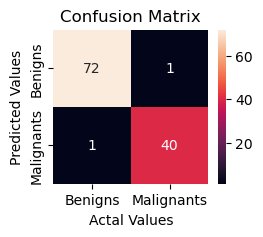

In [26]:
train_pred = clf_d19.predict(train_data)
test_pred = clf_d19.predict(test_data)
print(f"D19 Optimal hyperparameters:")
print_df(pd.DataFrame(grid_search_cv_d19.best_params_, index=["Value"]))
print("D19 Train set performance")
performance_table(calc_performance(train_pred, train_target))
print("D19 Test set performance")
performance = calc_performance(test_pred, test_target)
performance_table(performance)
confusion_table(performance)

## D20: How do these performances compare with the ones you obtained in D12? What changed with the use of a Random Forest model? Is this result what you would expect?

The performance of the random forest model is much better than the decision tree model. The accuracy is raised from 0.938 to 0.982. And the gap between train and test performance is also reduced, meaning that the overfitting problem is reduced and the model's generalization ability is improved. This is what I expected, since random forest is an ensemble model, it is expected to perform better than a single decision tree.

## D21: Thinking about the application and the different models you created, discuss:
- **Do you think these models are good enough and can be trusted to be used for real?**

    No, in the scenario of breast cancer classification, I think the models that have been implemented are not good enough to be used for real. The best model we have is the random forest model, which has an accuracy of 0.982, which means that there are still 1.8% of patients that are misclassified. This is unacceptable in the medical field.

- **Do you think a more complex model is necessary?**

    For the current dataset, I believe that using a more complex model would not bring much improvement. The number of features and number of samples are not large, thus there are not much information to be learned by a more complex model.

- **Do you think using a machine learning algorithm for this task is a good idea? That is, should this decision process be automated? Justify.**
    
    I think it is a good idea to use machine learning algorithm to assist the decision process. But the final decision should not be made by the model, but by the doctor, since the model is not perfect and missclassification may happen.

- **Are there considerations with the used dataset?**

    The data set is relatively small. Many of the changes to the model make only a small difference in numbers and are not significant enough to prove that the change is useful or not. Having more data would be important to research how to improve the model. 